In [4]:
from google.colab import files
uploaded = files.upload()




Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (1).csv


In [5]:
import pandas as pd

# Завантаження даних
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Перегляд перших 5 рядків
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
# Розмір датасету
print(f"Кількість рядків: {df.shape[0]}")
print(f"Кількість стовпців: {df.shape[1]}")

# Типи даних
df.info()


Кількість рядків: 374
Кількість стовпців: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)


In [7]:
# Дублікатів
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Пропущені значення
missing_values = df.isnull().sum()
print("Пропущені значення в кожному стовпці:")
print(missing_values)


Кількість дублікатів: 0
Пропущені значення в кожному стовпці:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder

# Створення копії датасету
df_encoded = df.copy()

# Перетворення категоріальних ознак
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Перевірка результату
df_encoded.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,11,77,4200,2
1,2,1,28,1,6.2,6,60,8,0,9,75,10000,2
2,3,1,28,1,6.2,6,60,8,0,9,75,10000,2
3,4,1,28,6,5.9,4,30,8,2,22,85,3000,1
4,5,1,28,6,5.9,4,30,8,2,22,85,3000,1


In [9]:
# Пропущені значення після кодування
missing_values_after = df_encoded.isnull().sum()
print("Пропущені значення після кодування:")
print(missing_values_after)


Пропущені значення після кодування:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [18]:
# Заповнення пропущених значень середнім для числових та модою для категоріальних
for col in df_encoded.columns:
    if df_encoded[col].dtype in ['float64', 'int64']:
        df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())
    else:
        df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])



In [19]:
# Статистичні характеристики
df_encoded.describe()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,1.296791,13.114973,70.165775,6816.844920,1.379679
std,108.108742,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,1.431226,7.100590,4.135676,1617.915679,0.805620
min,1.000000,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,0.000000,65.000000,3000.000000,0.000000
25%,94.250000,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,9.000000,68.000000,5600.000000,1.000000
50%,187.500000,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,15.000000,70.000000,7000.000000,2.000000
75%,280.750000,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,3.000000,20.000000,72.000000,8000.000000,2.000000
max,374.000000,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,3.000000,24.000000,86.000000,10000.000000,2.000000


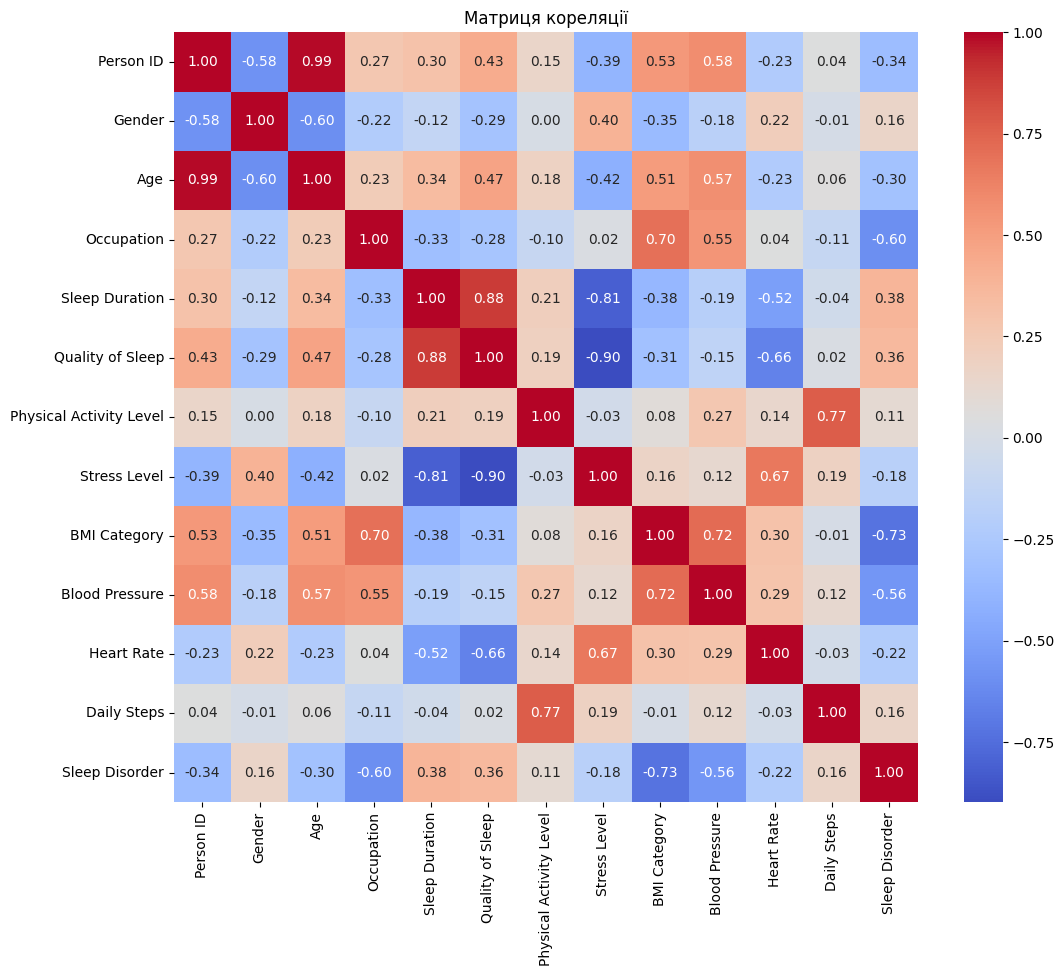

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Матриця кореляції
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()


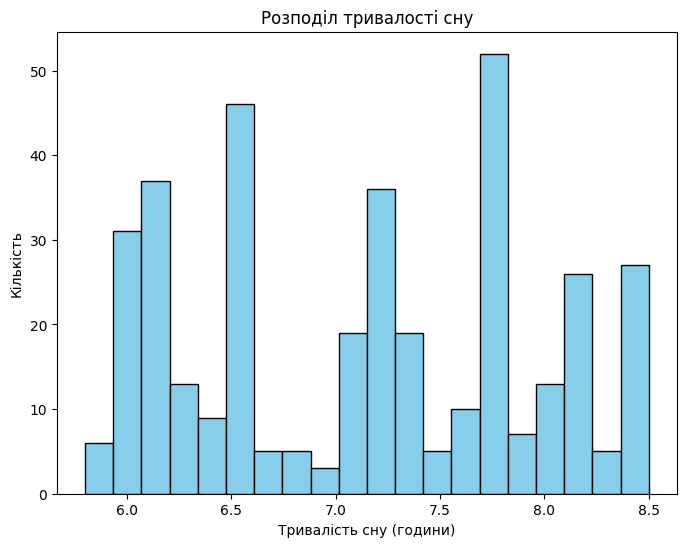

In [13]:
# Гістограма тривалості сну
plt.figure(figsize=(8,6))
plt.hist(df['Sleep Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл тривалості сну')
plt.xlabel('Тривалість сну (години)')
plt.ylabel('Кількість')
plt.show()


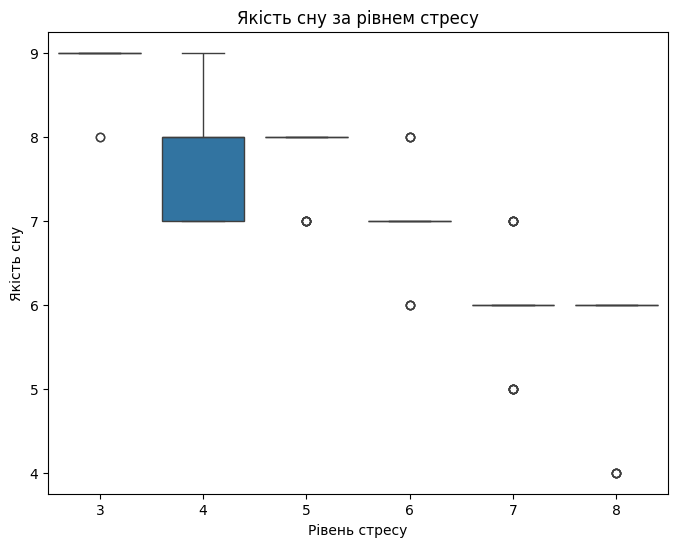

In [14]:
# Boxplot якості сну за рівнем стресу
plt.figure(figsize=(8,6))
sns.boxplot(x='Stress Level', y='Quality of Sleep', data=df)
plt.title('Якість сну за рівнем стресу')
plt.xlabel('Рівень стресу')
plt.ylabel('Якість сну')
plt.show()


In [15]:
import plotly.express as px

# Скатерплот тривалості сну та частоти серцебиття
fig = px.scatter(df, x='Sleep Duration', y='Heart Rate', color='Gender',
                 title='Тривалість сну vs Частота серцебиття')
fig.show()


In [16]:
import altair as alt

# Стовпчаста діаграма середньої якості сну за професією
alt.Chart(df).mark_bar().encode(
    x='Occupation',
    y='mean(Quality of Sleep)',
    color='Occupation'
).properties(
    title='Середня якість сну за професією'
).interactive()


alt.Chart(...)